In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('movies_metadata.csv')

C:\Users\preet\AppData\Local\Temp\ipykernel_8388\2089594497.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('movies_metadata.csv')


In [3]:
df.shape

(45466, 24)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",10/30/1995,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,FALSE,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",12/15/1995,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",12/22/1995,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,FALSE,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",12/22/1995,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/10/1995,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [7]:
df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [8]:
df = df.drop(['adult', 'belongs_to_collection','imdb_id','poster_path','overview','video','tagline'], axis=1)

In [9]:
df["budget"] = pd.to_numeric(df["budget"], errors="coerce")

In [10]:
df = df[(df['budget'] > 1000) & (df['revenue'] > 1000)]

In [11]:
df['primary_genre'] = df['genres'].str.split("'name': '").str[1].str.split("'").str[0]

In [12]:
df = df.drop(['genres','homepage'],axis=1)

In [13]:
df = df.dropna()


In [14]:
df.isnull().sum()

budget                  0
id                      0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
primary_genre           0
dtype: int64

In [15]:
df['popularity'] = df['popularity'].astype(float)

In [16]:
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')
df['vote_count'] = pd.to_numeric(df['vote_count'], errors='coerce')

In [17]:
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")

In [18]:
df["release_year"] = df["release_date"].dt.year
df['release_month'] = df['release_date'].dt.month
df['release_day'] = df['release_date'].dt.day

In [19]:
df['production_company'] = df['production_companies'].str.split("'name': '").str[1].str.split("'").str[0]

In [20]:
df['production_country'] = df['production_countries'].str.split("'name': '").str[1].str.split("'").str[0]

In [21]:
df = df.drop(['release_date','production_countries','production_companies'], axis=1)

In [22]:
df.isnull().sum()

budget                  0
id                      0
original_language       0
original_title          0
popularity              0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
primary_genre           0
release_year            0
release_month           0
release_day             0
production_company    157
production_country     49
dtype: int64

In [23]:
df = df.reset_index(drop=True)

In [24]:
df = df.drop(['id'], axis=1)

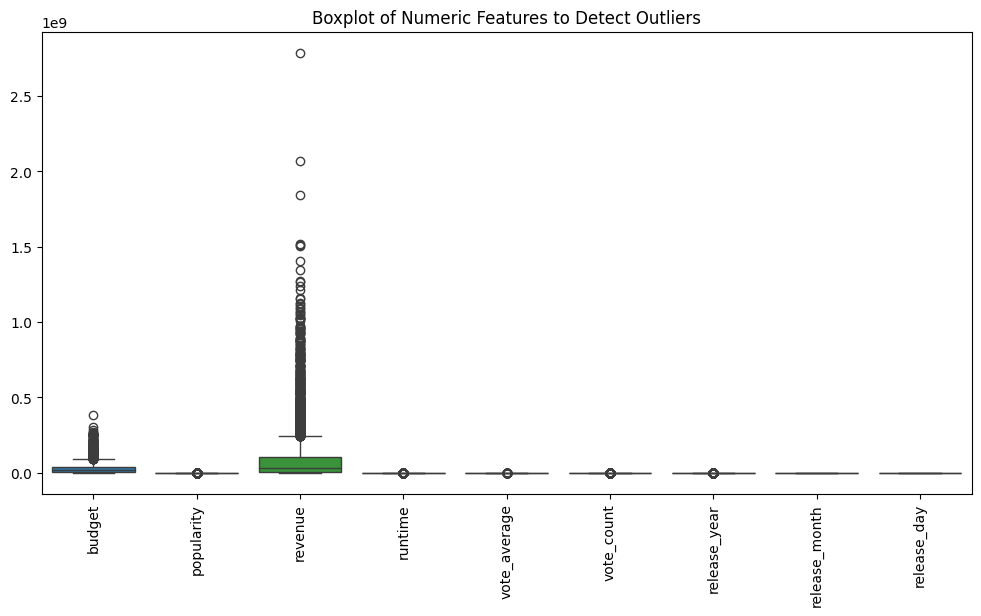

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['budget','popularity','revenue','runtime','vote_average','vote_count','release_year','release_month','release_day']])
plt.xticks(rotation=90)
plt.title('Boxplot of Numeric Features to Detect Outliers')
plt.show()

In [26]:
num_cols = ['budget','popularity','revenue','runtime','vote_average','vote_count','release_year','release_month','release_day']

In [27]:
q1 = df[num_cols].quantile(0.25)
q3 = df[num_cols].quantile(0.75)
iqr = q3 - q1

In [28]:
outliers = ((df[num_cols] < (q1 - 1.5 * iqr)) | (df[num_cols] > (q3 + 1.5 * iqr))).sum()

In [29]:
outliers

budget           401
popularity       199
revenue          531
runtime          189
vote_average      59
vote_count       545
release_year     291
release_month      0
release_day        0
dtype: int64

In [30]:
df = df[~((df[num_cols] < (q1 - 1.5 * iqr)) | (df[num_cols] > (q3 + 1.5 * iqr))).any(axis=1)]

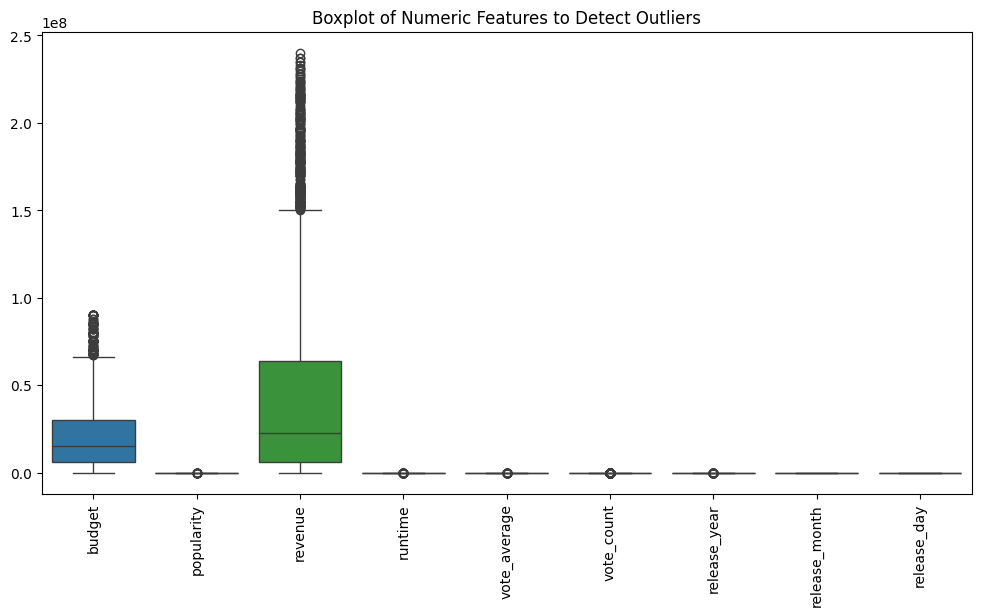

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['budget','popularity','revenue','runtime','vote_average','vote_count','release_year','release_month','release_day']])
plt.xticks(rotation=90)
plt.title('Boxplot of Numeric Features to Detect Outliers')
plt.show()

In [32]:
df.head()

,budget,original_language,original_title,popularity,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,primary_genre,release_year,release_month,release_day,production_company,production_country
2,16000000.0,en,Waiting to Exhale,3.859495,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34.0,Comedy,1995,12,22,Twentieth Century Fox Film Corporation,United States of America
4,35000000.0,en,Sudden Death,5.231580,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sudden Death,5.5,174.0,Action,1995,12,22,Universal Pictures,United States of America
6,62000000.0,en,The American President,6.318445,107879496.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The American President,6.5,199.0,Comedy,1995,11,17,Columbia Pictures,United States of America
10,16500000.0,en,Sense and Sensibility,10.673167,135000000.0,136.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sense and Sensibility,7.2,364.0,Drama,1995,12,13,Columbia Pictures Corporation,United Kingdom
11,4000000.0,en,Four Rooms,9.026586,4300000.0,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Four Rooms,6.5,539.0,Crime,1995,12,9,Miramax Films,United States of America


In [33]:
df = df.drop(['original_title','title'],axis=1)

In [34]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlation_matrix_with_revenue = correlation_matrix['revenue'].sort_values(ascending = False)
correlation_matrix_with_revenue

revenue          1.000000
vote_count       0.576263
budget           0.561353
popularity       0.383724
runtime          0.113532
release_month    0.053231
vote_average     0.045692
release_day      0.016844
release_year     0.016822
Name: revenue, dtype: float64

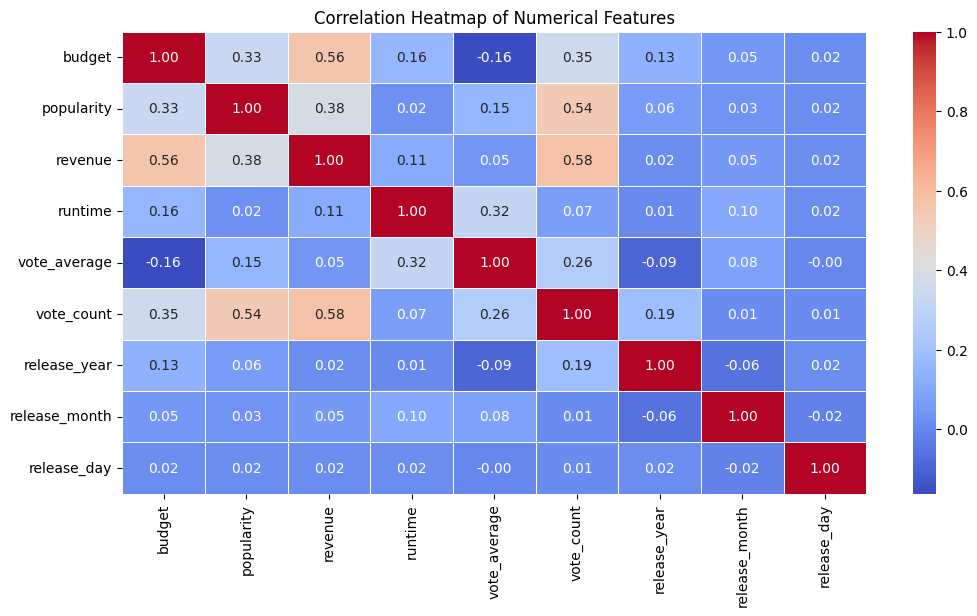

In [35]:
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


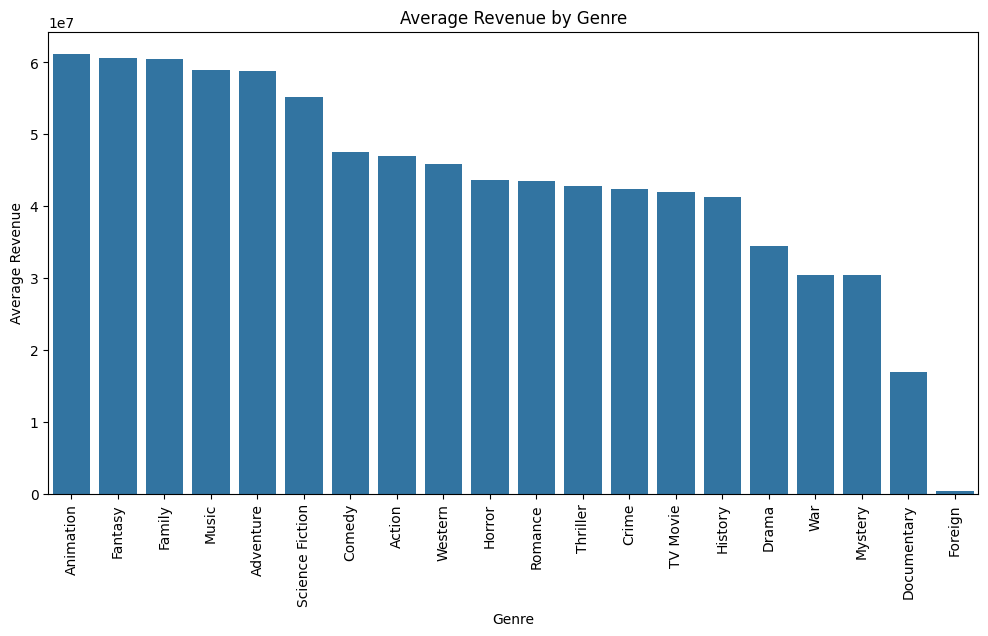

In [36]:
genre_revenue = df.groupby('primary_genre')['revenue'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_revenue.index, y=genre_revenue.values)
plt.xticks(rotation=90)
plt.title('Average Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Revenue')
plt.show()

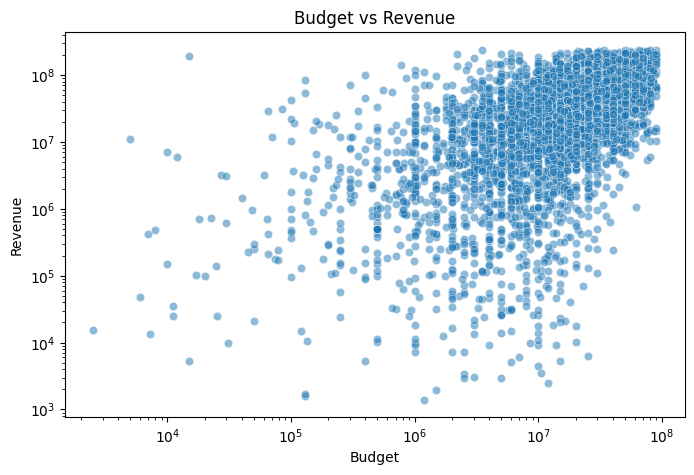

In [37]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['budget'], y=df['revenue'], alpha=0.5)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.xscale('log')
plt.yscale('log')
plt.show()

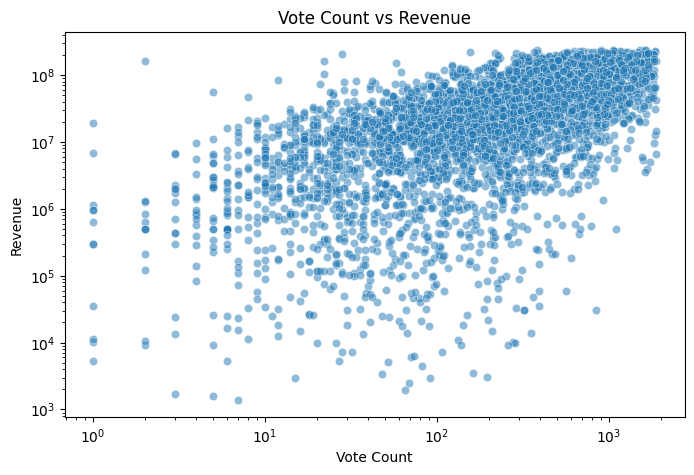

In [38]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['vote_count'], y=df['revenue'], alpha=0.5)
plt.title('Vote Count vs Revenue')
plt.xlabel('Vote Count')
plt.ylabel('Revenue')
plt.xscale('log')
plt.yscale('log')
plt.show()

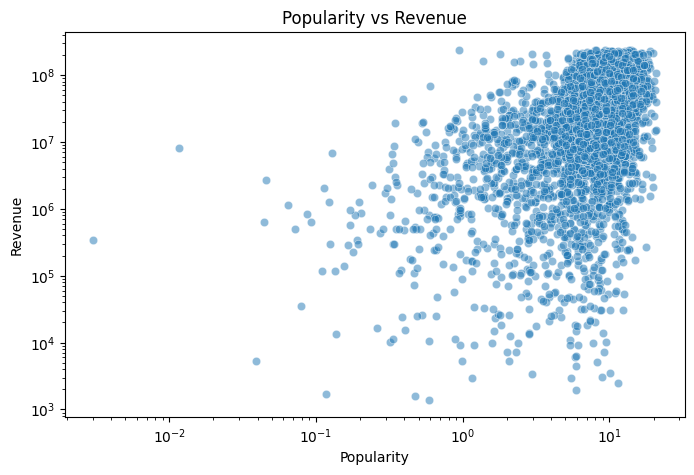

In [39]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['popularity'], y=df['revenue'], alpha=0.5)
plt.title('Popularity vs Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [40]:
df.head()

,budget,original_language,popularity,revenue,runtime,spoken_languages,status,vote_average,vote_count,primary_genre,release_year,release_month,release_day,production_company,production_country
2,16000000.0,en,3.859495,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,6.1,34.0,Comedy,1995,12,22,Twentieth Century Fox Film Corporation,United States of America
4,35000000.0,en,5.231580,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,5.5,174.0,Action,1995,12,22,Universal Pictures,United States of America
6,62000000.0,en,6.318445,107879496.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,6.5,199.0,Comedy,1995,11,17,Columbia Pictures,United States of America
10,16500000.0,en,10.673167,135000000.0,136.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,7.2,364.0,Drama,1995,12,13,Columbia Pictures Corporation,United Kingdom
11,4000000.0,en,9.026586,4300000.0,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,6.5,539.0,Crime,1995,12,9,Miramax Films,United States of America


In [41]:
df = df.drop(['spoken_languages'],axis=1)

In [42]:
df['original_language'].unique()

array(['en', 'fr', 'cn', 'ru', 'es', 'zh', 'sv', 'de', 'ja', 'fa', 'pt',
       'xx', 'da', 'ko', 'it', 'pl', 'af', 'fi', 'th', 'nl', 'ro', 'hi',
       'vi', 'bm', 'he', 'no', 'ta', 'sr', 'nb', 'ca', 'id', 'tr', 'hu',
       'kn', 'ml', 'ur', 'te'], dtype=object)

In [43]:
df.to_csv('movies_cleaned.csv', index=False)

In [44]:
df = pd.get_dummies(df, columns=['primary_genre'])


Built model

In [45]:
X = df.drop(columns=['revenue'])
y = df['revenue']

In [46]:
categorical_cols = ['primary_genre', 'primary_language']
numerical_cols = ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count', 'release_year', 'release_month', 'release_day']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [49]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

In [50]:
model.fit(X_train, y_train)

ValueError: A given column is not a column of the dataframe

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)

In [ ]:
r2